# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
Dataset ini, sering disebut sebagai UCI Heart Disease atau Dataset Penyakit Jantung Cleveland (meskipun mencakup data dari lokasi lain), berasal dari Repositori Machine Learning University of California, Irvine (UCI). Ia menggabungkan catatan pasien dari empat pusat medis utama: Cleveland Clinic Foundation, Hungarian Institute of Cardiology, Swiss University Hospital, dan VA Long Beach Healthcare System. Dengan total 920 entri, dataset ini menangkap beragam informasi demografis dan klinis, memungkinkan analisis mendalam tentang faktor risiko penyakit jantung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Mengatur agar plot seaborn memiliki style yang lebih menarik
sns.set_theme(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [20]:
df = pd.read_csv("/content/namadataset_raw/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [21]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [22]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah Missing Values per Kolom:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64
----------------------------------------

Distribusi Kelas Target (num):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


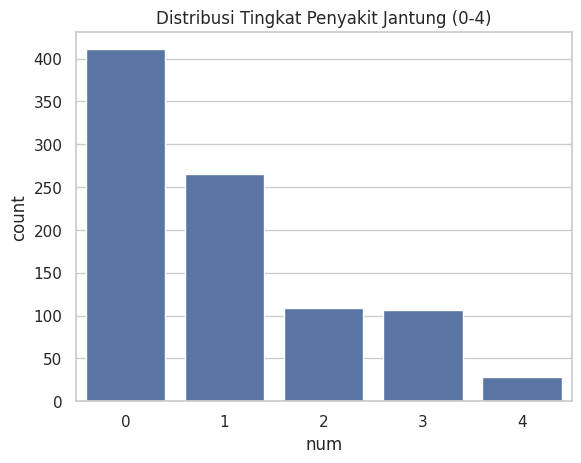

----------------------------------------

Distribusi Jenis Nyeri Dada (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


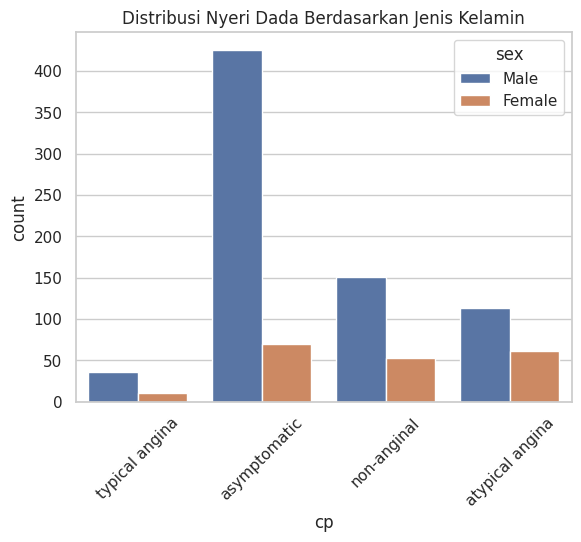

In [24]:
# 1. Cek jumlah nilai yang hilang di setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum().sort_values(ascending=False))
print("-" * 40)
# 2. Analisis kolom target 'num'
# Kolom ini menunjukkan tingkat penyakit jantung (0=tidak ada, 1-4=ada)
print("\nDistribusi Kelas Target (num):")
print(df['num'].value_counts())
sns.countplot(x='num', data=df)
plt.title('Distribusi Tingkat Penyakit Jantung (0-4)')
plt.show()
print("-" * 40)
# 3. Analisis kolom kategorikal lain, contohnya 'cp' (jenis nyeri dada)
print("\nDistribusi Jenis Nyeri Dada (cp):")
print(df['cp'].value_counts())
sns.countplot(x='cp', data=df, hue='sex')
plt.title('Distribusi Nyeri Dada Berdasarkan Jenis Kelamin')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [25]:
# Drop duplicate
df = df.drop_duplicates()

# Drop missing value
df = df.dropna()

# Pisahkan fitur & target
X = df.drop(columns=['num'])
y = df['num']


In [28]:
df_clean = df.copy()

# 1. Membuat Target Biner (Sakit vs Tidak Sakit)
# Untuk menyederhanakan masalah, kita ubah 'num' (0-4) menjadi 'target' (0 atau 1).
# 0 = Tidak sakit, 1 = Sakit (jika num > 0)
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)
print("Kolom 'target' biner berhasil dibuat.")

# 2. Menghapus Kolom yang Tidak Diperlukan
df_clean = df_clean.drop(['id', 'dataset', 'num'], axis=1)
print("Kolom yang tidak diperlukan (id, dataset, num) telah dihapus.")

# 3. Menangani Data Tidak Logis (Outlier)
df_clean['trestbps'] = df_clean['trestbps'].replace(0, np.nan)
print(f"Mengubah {df_clean['trestbps'].isnull().sum()} nilai 0 pada 'trestbps' menjadi NaN.")

# 4. Encoding Kolom Kategorikal menjadi Angka
categorical_cols = df_clean.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    # Gunakan .astype(str) untuk menangani nilai NaN dan tipe data campuran
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
print("Semua kolom kategorikal telah di-encode menjadi angka.")

# 5. Menangani Nilai Hilang (Missing Values) dengan IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)

original_columns = df_clean.columns

df_imputed_np = imputer.fit_transform(df_clean)

df_clean = pd.DataFrame(df_imputed_np, columns=original_columns)
print("Semua nilai yang hilang (missing values) telah diisi menggunakan IterativeImputer.")

# 6. Verifikasi dan Simpan Data Bersih
print("\nMemeriksa kembali missing values setelah dibersihkan:")
print(df_clean.isnull().sum())

# Membuat folder output jika belum ada
output_dir = './heart_disease_preprocessing'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simpan dataset yang sudah bersih
cleaned_file_path = os.path.join(output_dir, 'heart_cleaned.csv')
df_clean.to_csv(cleaned_file_path, index=False)
print(f"\nDataset bersih berhasil disimpan di: {cleaned_file_path}")

print("\nContoh 5 baris pertama dari data yang sudah bersih:")
display(df_clean.head())

Kolom 'target' biner berhasil dibuat.
Kolom yang tidak diperlukan (id, dataset, num) telah dihapus.
Mengubah 0 nilai 0 pada 'trestbps' menjadi NaN.
Semua kolom kategorikal telah di-encode menjadi angka.
Semua nilai yang hilang (missing values) telah diisi menggunakan IterativeImputer.

Memeriksa kembali missing values setelah dibersihkan:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset bersih berhasil disimpan di: ./heart_disease_preprocessing/heart_cleaned.csv

Contoh 5 baris pertama dari data yang sudah bersih:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1.0
2,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1.0
3,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0.0
4,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0.0
